In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv('rice_crop_data.csv')

In [3]:
data.head()

,Area,Year,Unit,Value,Flag,Flag Description
0,Afghanistan,1961,tonnes,319000.0,A,Official figure
1,Afghanistan,1962,tonnes,319000.0,A,Official figure
2,Afghanistan,1963,tonnes,319000.0,A,Official figure
3,Afghanistan,1964,tonnes,380000.0,A,Official figure
4,Afghanistan,1965,tonnes,380000.0,A,Official figure


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Value'].values.reshape(-1, 1))

In [7]:
time_steps = 5

In [8]:
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

In [9]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [10]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=1))

In [12]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X, y, epochs=300, batch_size=32)

Epoch 1/300
229/229 [==============================] - 16s 25ms/step - loss: 0.0023
Epoch 2/300
229/229 [==============================] - 4s 19ms/step - loss: 0.0015
Epoch 3/300
229/229 [==============================] - 4s 19ms/step - loss: 0.0015
Epoch 4/300
229/229 [==============================] - 6s 25ms/step - loss: 0.0015
Epoch 5/300
229/229 [==============================] - 4s 19ms/step - loss: 0.0010
Epoch 6/300
229/229 [==============================] - 5s 23ms/step - loss: 7.8345e-04
Epoch 7/300
229/229 [==============================] - 5s 20ms/step - loss: 6.2970e-04
Epoch 8/300
229/229 [==============================] - 4s 19ms/step - loss: 5.8699e-04
Epoch 9/300
229/229 [==============================] - 6s 24ms/step - loss: 5.3695e-04
Epoch 10/300
229/229 [==============================] - 4s 19ms/step - loss: 5.9424e-04
Epoch 11/300
229/229 [==============================] - 5s 20ms/step - loss: 5.9271e-04
Epoch 12/300
229/229 [==============================] - 6s 2

In [30]:
country_name = input('Enter the country name: ')
year = int(input('Enter the year: '))

country_data = data[(data['Area'] == country_name) & (data['Year'] <= year)]
inputs = country_data['Value'].values[-time_steps:]
inputs = scaler.transform(inputs.reshape(-1, 1))
inputs = np.array(inputs).reshape(1, time_steps, 1)
predicted_value = model.predict(inputs)
predicted_value = scaler.inverse_transform(predicted_value)

Enter the country name: India
Enter the year: 2023
1/1 [==============================] - 0s 23ms/step


In [31]:
print('Predicted rice crop production for', country_name, 'in', year, ':', predicted_value[0][0], 'tonnes')

Predicted rice crop production for India in 2023 : 183540380.0 tonnes


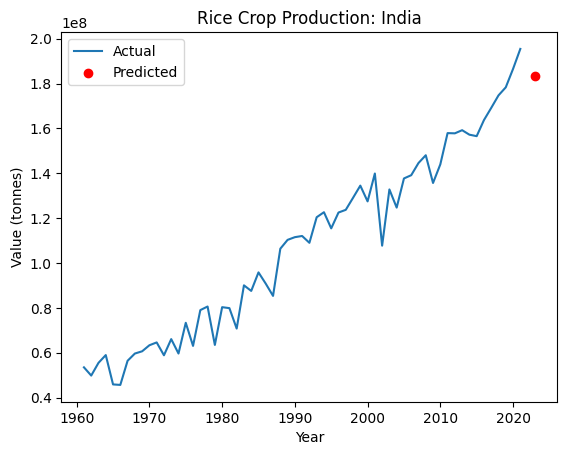

In [32]:
import matplotlib.pyplot as plt
country_data = data[data['Area'] == country_name]
plt.plot(country_data['Year'], country_data['Value'], label='Actual')
plt.scatter(year, predicted_value[0][0], color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value (tonnes)')
plt.title('Rice Crop Production: ' + country_name)
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

actual_values = country_data['Value'].values[-len(inputs):]

actual_values = np.reshape(actual_values, (len(actual_values), 1))
actual_values = scaler.inverse_transform(actual_values)

rmse = sqrt(mean_squared_error(actual_values, predicted_value))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 4.190497261932711e+16
